In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import os
import cv2
import keras
from keras.models import load_model
import time
import math

Using TensorFlow backend.


In [2]:
model = load_model('Flood_detector/floodmodel.h5')
# prediction = model.predict(patch_resized)

In [3]:
# Load the image for inference
image_path = "DP_BUND_BUNDABERG_NORTH_AP_2011_13CM_lowqual.jpeg"
org_image = cv2.imread(image_path)

org_image = cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB)
# Make deep copy since we dont want to overlay on to the original
overlayed_image = org_image[:,:,:]

x, y, z = org_image.shape
x_shape = 512
y_shape = 512 
total_in_x = math.floor(x/x_shape)
total_in_y = math.floor(y/y_shape)

In [4]:
def crop_to_coords(coords):

    x1,x2,y1,y2 = coords
    return org_image[y1:y2,x1:x2,:]   
    
def plot_fig(to_plot):
#             image_plots = plt.figure(1)
    image_plots = plt.figure(1, figsize=(5, 5))

    fig = image_plots.add_subplot(1,1,1)
    fig.imshow(cv2.cvtColor(to_plot, cv2.COLOR_BGR2RGBA))
    fig.set_title('result')
    plt.show()
    return 

In [13]:
x1 = 0
x2 = 0
y1 = 0
y2 = 0
for i in range(total_in_y):
    for j in range(total_in_x):
        
        x1 = x_shape*j
        x2 = x_shape*(j+1)
        y1 = y_shape*i
        y2 = y_shape*(i+1)
        coords = (x1,x2,y1,y2)

        result = crop_to_coords((x1,x2,y1,y2))
        if result.size != 0:
            
            patch_resized = cv2.resize(result, (512, 512))[np.newaxis, :,:,:].astype(np.float32)/255
            prediction = model.predict(patch_resized,verbose=0)
            
            print(prediction[0])
            # Get Class 0 (flood)
            if prediction[0][0] >= 0.3:
                overlayed_image[y1:y2,x1:x2,:] = cv2.applyColorMap(result, cv2.COLORMAP_PINK)
                print('flood')

        


[0.25938016 0.7406199 ]
[0.2339039  0.76609606]
[0.03791483 0.9620851 ]
[0.09866089 0.9013391 ]
[0.06877906 0.93122095]
[0.20071152 0.7992885 ]
[0.28011566 0.71988434]
[7.233583e-07 9.999993e-01]
[0.18795204 0.81204796]
[0.02856957 0.9714305 ]
[0.03981283 0.9601872 ]
[0.01561158 0.9843885 ]
[0.00834802 0.99165195]
[0.02074736 0.97925264]
[0.34429735 0.65570265]
flood
[0.20545831 0.79454166]
[0.00803106 0.9919689 ]
[0.01830958 0.98169047]
[0.02727515 0.97272485]
[0.04320917 0.9567908 ]
[1.6057394e-06 9.9999845e-01]
[0.35040298 0.64959705]
flood
[0.03537407 0.96462595]
[0.02055523 0.9794448 ]
[0.17838751 0.82161254]
[0.20806116 0.79193884]
[0.01801634 0.98198366]
[0.01961602 0.98038393]
[0.04849156 0.95150846]
[0.0378194 0.9621806]
[0.04775183 0.95224816]
[0.03897412 0.96102595]
[0.03660112 0.9633989 ]
[0.05560176 0.9443982 ]
[0.13115871 0.8688413 ]
[0.1220261 0.8779739]
[0.00612989 0.99387014]
[0.05671757 0.9432824 ]
[0.13423194 0.8657681 ]
[0.3567084  0.64329153]
flood
[0.1065416 0.893

(1450, 2000, 3)


<IPython.core.display.Javascript object>


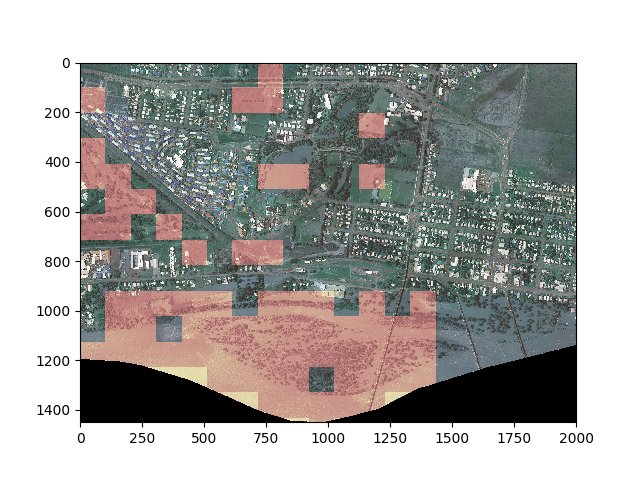

In [14]:
to_plot = cv2.resize(cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB), None, fx=0.2, fy=0.2)
print(to_plot.shape)
plt.imshow(to_plot)

In [15]:
cv2.imwrite('DP_BUND_BUNDABERG_NORTH_AP_2011_13CM_lowqual_overlayed.png', cv2.resize(overlayed_image, None, fx=0.3, fy=0.3))

True